# 영화 감성 리뷰
### Netflix의 영화 리뷰 데이터를 사용하여, 리뷰의 평점을 예측해보고, 긍정과 부정 감정을 분류

#### 데이터셋 불러오기

In [7]:
#필요 라이브러리 임포트
import pandas as pd

#데이터 불러오기
df = pd.read_csv('netflix_reviews.csv')

In [8]:
#데이터 출력
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,09ed2c3a-a4ca-4241-a01c-e7543943ee05,reyes Cruz,Very good experience. Great customer service.,5,0,7.89.0 build 18 35322,2024-10-20 14:10:34,7.89.0 build 18 35322
1,b2d324ff-0005-45c4-accf-dc983124400d,NISITH DISSANAYAKE (Widenn Gamer),Bro I was watching w cartoon then this error c...,1,0,8.136.0 build 3 50908,2024-10-20 14:10:25,8.136.0 build 3 50908
2,2d619b1e-aca3-4807-b77f-c9446a606ddf,Evelyn Okoro,Desent,5,0,NaN,2024-10-20 14:06:08,NaN
3,03cc29b9-a49a-4e26-885a-d1652bb669be,Yogesh Bhatta,THIS IS SCAM COMPANY.. THEY JUST LOOT PEOPLE M...,1,0,7.98.0 build 7 35414,2024-10-20 14:02:13,7.98.0 build 7 35414
4,c1b98dcf-0b75-4952-b9ac-6165381f41cf,P3L0NAZ0,Stopped opening. I've uninstalled and reinstal...,1,0,8.136.0 build 3 50908,2024-10-20 14:01:12,8.136.0 build 3 50908
...,...,...,...,...,...,...,...,...
117035,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117036,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117037,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117038,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346


In [9]:
#데이터 출력(상단5개)
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,09ed2c3a-a4ca-4241-a01c-e7543943ee05,reyes Cruz,Very good experience. Great customer service.,5,0,7.89.0 build 18 35322,2024-10-20 14:10:34,7.89.0 build 18 35322
1,b2d324ff-0005-45c4-accf-dc983124400d,NISITH DISSANAYAKE (Widenn Gamer),Bro I was watching w cartoon then this error c...,1,0,8.136.0 build 3 50908,2024-10-20 14:10:25,8.136.0 build 3 50908
2,2d619b1e-aca3-4807-b77f-c9446a606ddf,Evelyn Okoro,Desent,5,0,NaN,2024-10-20 14:06:08,NaN
3,03cc29b9-a49a-4e26-885a-d1652bb669be,Yogesh Bhatta,THIS IS SCAM COMPANY.. THEY JUST LOOT PEOPLE M...,1,0,7.98.0 build 7 35414,2024-10-20 14:02:13,7.98.0 build 7 35414
4,c1b98dcf-0b75-4952-b9ac-6165381f41cf,P3L0NAZ0,Stopped opening. I've uninstalled and reinstal...,1,0,8.136.0 build 3 50908,2024-10-20 14:01:12,8.136.0 build 3 50908


In [10]:
#데이터 출력(하단5개)
df.tail()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
117035,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117036,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117037,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117038,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346
117039,dc1352e9-10a8-41ca-ab23-05d045b08e90,suraj soni,"this app is awesome for english movies ,series...",4,0,NaN,2020-05-24 11:04:08,NaN


In [11]:
#shape 출력

# 데이터프레임의 모양 출력
print(f"Shape of the dataset: {df.shape}")

# 데이터프레임의 열 이름 출력
print(f"Columns in the dataset: {df.columns}")

Shape of the dataset: (117040, 8)
Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


---

#### 데이터 전처리

In [12]:
#데이터 전처리
def preprocess_text(text): #텍스트 데이터를 입력받아 전처리된 결과를 반환하는 함수. 입력 변수는 text.
    if isinstance(text, float): #text라는 변수에 담긴 값이 실수(float) 타입인지 검사
        return "" #만약 text가 실수인 경우, 이후의 문자열 처리 과정에서 오류가 발생할 수 있기 때문에, 이와 같은 실수 타입의 데이터는 빈 문자열 ""로 변환
    text = text.lower() #대문자를 소문자로 변환
    text = re.sub(r'[^\w\s]', '', text) #정규 표현식을 사용하여 구두점(마침표, 쉼표 등)을 제거. 단어와 공백(\w와\s)을 제외한 모든 문자를 제거하는 역할
    text = re.sub(r'\d+', '', text) #숫자를 모두 제거, 정규 표현식 \d+는 하나 이상의 숫자를 의미하며, 이를 빈 문자열로 대체
    text = text.strip() #text.strip()은 문자열 양 끝에 있는 불필요한 공백을 제거합니다. 텍스트 중간에 있는 공백은 그대로 두지만, 시작이나 끝부분의 공백은 제거
    return text

/var/folders/hx/68vgjxsx1fz3b23kg7xk3njh0000gn/T/ipykernel_8343/251318026.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_counts.index, y=score_counts.values, palette="Greens")


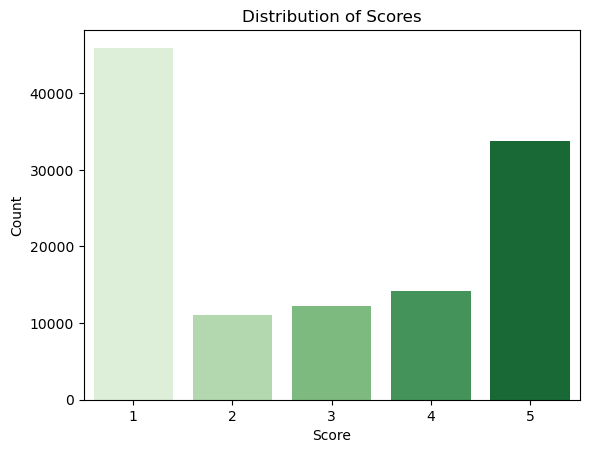

In [13]:
#feature 분석(EDA)

# 라이브러리 임포트
import seaborn as sns
import matplotlib.pyplot as plt

# 리뷰 점수에 대한 빈도를 계산
score_counts = df['score'].value_counts().sort_index()
#value_counts(): df['score']에 있는 각 점수의 빈도를 계산. 이 함수는 각 점수가 몇 번 나타났는지 계산하여 반환
#sort_index(): 점수의 크기 순으로 정렬 (예. 1점, 2점, 3점 ...)

# 바 그래프 생성
sns.barplot(x=score_counts.index, y=score_counts.values, palette="Greens")
# x=score_counts.index: x축에 각 점수(1,2,3,4,5)를 배치
# y=score_counts.value: y축에 각 점수에 해당하는 리뷰의 빈도를 배치
# palette: 막대그래프 색상 변경

plt.xlabel('Score')  # x축 라벨
plt.ylabel('Count')  # y축 라벨
plt.title('Distribution of Scores')  # 그래프 제목
plt.show() #그래프 출력

---

### 리뷰 예측 모델 학습시키기(LSTM)

- 로지스틱 회귀 등을 사용하여, 리뷰에 대한 점수를 예측

In [22]:
#라이브러리 임포트
import re
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab
from torch.nn.utils.rnn import pad_sequence

In [23]:
# 텍스트 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    return text

In [24]:
# 데이터 전처리
df['content'] = df['content'].apply(preprocess_text)

In [25]:
# 토큰화
tokenizer = get_tokenizer("basic_english")

In [26]:
# 어휘 사전 구축
def yield_tokens(data_iter):
    for text in data_iter:
        yield tokenizer(text)

In [27]:
# 어휘 사전 생성
counter = Counter()
for tokens in yield_tokens(df['content']):
    counter.update(tokens)

In [28]:
# 특별 토큰을 포함한 어휘 사전 생성
special_tokens = ["<unk>"]
vocab = Vocab(counter, specials=special_tokens)

In [29]:
# 'tokenized' 열 생성
df['tokenized'] = df['content'].apply(lambda x: [vocab[token] for token in tokenizer(x)])

In [30]:
# 데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        return torch.tensor(text, dtype=torch.long), torch.tensor(label, dtype=torch.long)

In [31]:
# 점수를 숫자로 인코딩
label_encoder = LabelEncoder()
df['score_encoded'] = label_encoder.fit_transform(df['score'])

In [32]:
# 훈련 및 테스트 데이터 분리
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['tokenized'], df['score_encoded'], test_size=0.2, random_state=42
)

In [33]:
# 패딩을 적용한 collate_fn 정의
def collate_fn(batch):
    texts, labels = zip(*batch)
    texts = [torch.tensor(text, dtype=torch.long) for text in texts]  # long 타입으로 변환
    texts_padded = pad_sequence(texts, batch_first=True, padding_value=vocab['<unk>'])  # 패딩 적용
    labels = torch.tensor(labels, dtype=torch.long)  # long 타입으로 변환
    return texts_padded, labels

In [34]:
# 데이터 로더 정의
train_dataset = ReviewDataset(train_texts.tolist(), train_labels.tolist())
test_dataset = ReviewDataset(test_texts.tolist(), test_labels.tolist())

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, collate_fn=collate_fn)

In [35]:
# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        lstm_out, _ = self.lstm(embedded)
        lstm_out = lstm_out[:, -1, :]  # 마지막 타임스텝의 출력 사용
        output = self.fc(lstm_out)
        return output

In [36]:
# 하이퍼파라미터 정의
vocab_size = len(vocab)  # 어휘 사전의 크기
embedding_dim = 128  # 임베딩 차원
hidden_dim = 256  # LSTM 은닉층 차원
output_dim = len(label_encoder.classes_)  # 출력 차원 (점수 개수)

In [37]:
# 모델 초기화
model = LSTMModel(vocab_size, embedding_dim, hidden_dim, output_dim)

In [38]:
# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()  # 분류 문제이므로 교차 엔트로피 손실 사용
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [39]:
# 모델 학습 및 평가 함수
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(texts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def evaluate(model, test_loader, criterion, device):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for texts, labels in test_loader:
            texts, labels = texts.to(device), labels.to(device)
            outputs = model(texts)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            preds = outputs.argmax(dim=1)
            correct += (preds == labels).sum().item()
    accuracy = correct / len(test_loader.dataset)
    return total_loss / len(test_loader), accuracy

In [40]:
# 학습 루프
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(num_epochs):
    train_loss = train(model, train_loader, criterion, optimizer, device)
    test_loss, test_accuracy = evaluate(model, test_loader, criterion, device)
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

/var/folders/hx/68vgjxsx1fz3b23kg7xk3njh0000gn/T/ipykernel_8343/1320788819.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  texts = [torch.tensor(text, dtype=torch.long) for text in texts]  # long 타입으로 변환


Epoch 1, Train Loss: 1.2116, Test Loss: 0.9946, Test Accuracy: 0.6408
Epoch 2, Train Loss: 0.9525, Test Loss: 0.9366, Test Accuracy: 0.6552
Epoch 3, Train Loss: 0.8880, Test Loss: 0.9190, Test Accuracy: 0.6603
Epoch 4, Train Loss: 0.8356, Test Loss: 0.9225, Test Accuracy: 0.6601
Epoch 5, Train Loss: 0.7779, Test Loss: 0.9545, Test Accuracy: 0.6496
Epoch 6, Train Loss: 0.7114, Test Loss: 1.0104, Test Accuracy: 0.6433
Epoch 7, Train Loss: 0.6351, Test Loss: 1.0646, Test Accuracy: 0.6301
Epoch 8, Train Loss: 0.5555, Test Loss: 1.1675, Test Accuracy: 0.6210
Epoch 9, Train Loss: 0.4787, Test Loss: 1.2460, Test Accuracy: 0.6124
Epoch 10, Train Loss: 0.4148, Test Loss: 1.3261, Test Accuracy: 0.6110


In [41]:
# 예측 함수(예시)
def predict_review(model, review_text, vocab, tokenizer, device):
    model.eval()
    tokenized = [vocab[token] for token in tokenizer(review_text)]
    input_tensor = torch.tensor([tokenized], dtype=torch.long).to(device)
    with torch.no_grad():
        output = model(input_tensor)
        prediction = torch.argmax(output, dim=1).item()
    return label_encoder.inverse_transform([prediction])[0]  # 예측된 점수를 원래 점수로 변환

In [54]:
# 새로운 리뷰에 대한 예측
new_review = "this movie was bad."
predicted_score = predict_review(model, new_review, vocab, tokenizer, device)
print(f"Predicted Score: {predicted_score}")

Predicted Score: 1
